<span style="color:#929591">Chapter 1.
# <span style="color:#820747">Churn in Telecom's.

<img src="img/main.jpg">

# <span style="color:#a83c09">Navigator:

<b>[Dictionary](img/dictionary.txt)

<b>[2. Feature engineering](./2_Feature_engineering.ipynb)

<b>[3. Modeling - Classification problem](./3_Modeling.ipynb)

<b>[4. Dealing with Class Imbalance problem](./4_PlayWithUnbalancedClasses.ipynb)

<img src="img/lin.jpg">

# <span style="color:#a83c09">Chapter 1 Structure:

A. <b>Data investigation</b><br>
         
B. <b>EDA</b><br>
           1. Check how imbalanced our target.
           2. Customers in different States.
           3. Account lenghth distribution + boxplot to detect outliers.
           4. How many customers in different Areas.
           5. Phone number.
           6. International Plan.
           7. Voice Mail Plan.
           8. Number vmail messages.
           9. Total day minutes.
           10. Total day calls.
           11. Total day charge.
           12. Total eve minutes.
           13. Total eve calls.
           14. Total eve charge vs day charge.
           15. Total night minutes.
           16. Total night calls.
           17. Total night charge vs day charge.
           18. Total intl minutes.
           19. Total intl calls.
           20. Total intl charge.
           21. Customer service calls.


<img src="img/lin.jpg">

In [613]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()

# <span style="color:#040273">Part A. Data investigation.

In [680]:
# Load data set
df = pd.read_csv('raw_data.csv')

In [681]:
df.head(10)

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   
5    AL             118        510     391-8027                yes   
6    MA             121        510     355-9993                 no   
7    MO             147        415     329-9001                yes   
8    LA             117        408     335-4719                 no   
9    WV             141        415     330-8173                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   
5              no                      0              223.4               98   
6             yes                     24              218.2               88   
7              no                      0              157.0               79   
8              no                      0              184.5               97   
9             yes                     37              258.6               84   

   total day charge  ...    total eve calls  total eve charge  \
0             45.07  ...                 99             16.78   
1             27.47  ...                103             16.62   
2             41.38  ...                110             10.30   
3             50.90  ...                 88              5.26   
4             28.34  ...                122             12.61   
5             37.98  ...                101             18.75   
6             37.09  ...                108             29.62   
7             26.69  ...                 94              8.76   
8             31.37  ...                 80             29.89   
9             43.96  ...                111             18.87   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   
5                203.9                118                9.18   
6                212.6                118                9.57   
7                211.8                 96                9.53   
8                215.8                 90                9.71   
9                326.4                 97               14.69   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   
5                 6.3                 6               1.70   
6                 7.5                 7               2.03   
7                 7.1                 6               1.92   
8                 8.7                 4               2.35   
9                11.2                 5               3.02   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  
5                       0

In [682]:
df.columns.values

array(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'], dtype=object)

In [683]:
# Check for number of records and columns
print('Data has: [',df.shape[0], ' records] and [', df.shape[1] - 1, " features] plus Target")

Data has: [ 3333  records] and [ 20  features] plus Target


In [684]:
# Count number of Null values and their percentage in == df == dataset.
order = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
missing_df  = pd.concat([order, percent], axis=1, keys=['Null count', 'Null count (%)'])
missing_df.head(21)

Null count  Null count (%)
churn                            0             0.0
total day charge                 0             0.0
account length                   0             0.0
area code                        0             0.0
phone number                     0             0.0
international plan               0             0.0
voice mail plan                  0             0.0
number vmail messages            0             0.0
total day minutes                0             0.0
total day calls                  0             0.0
total eve minutes                0             0.0
customer service calls           0             0.0
total eve calls                  0             0.0
total eve charge                 0             0.0
total night minutes              0             0.0
total night calls                0             0.0
total night charge               0             0.0
total intl minutes               0             0.0
total intl calls                 0             0.0
total intl charge                0             0.0
state                            0             0.0

In [685]:
df.describe()

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

In [686]:
# Check for features types in data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In [687]:
# change churn type from boolean to int
df.churn = df.churn.astype(int)
df.head(10)

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   
5    AL             118        510     391-8027                yes   
6    MA             121        510     355-9993                 no   
7    MO             147        415     329-9001                yes   
8    LA             117        408     335-4719                 no   
9    WV             141        415     330-8173                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   
5              no                      0              223.4               98   
6             yes                     24              218.2               88   
7              no                      0              157.0               79   
8              no                      0              184.5               97   
9             yes                     37              258.6               84   

   total day charge  ...    total eve calls  total eve charge  \
0             45.07  ...                 99             16.78   
1             27.47  ...                103             16.62   
2             41.38  ...                110             10.30   
3             50.90  ...                 88              5.26   
4             28.34  ...                122             12.61   
5             37.98  ...                101             18.75   
6             37.09  ...                108             29.62   
7             26.69  ...                 94              8.76   
8             31.37  ...                 80             29.89   
9             43.96  ...                111             18.87   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   
5                203.9                118                9.18   
6                212.6                118                9.57   
7                211.8                 96                9.53   
8                215.8                 90                9.71   
9                326.4                 97               14.69   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   
5                 6.3                 6               1.70   
6                 7.5                 7               2.03   
7                 7.1                 6               1.92   
8                 8.7                 4               2.35   
9                11.2                 5               3.02   

   customer service calls  churn  
0                       1      0  
1                       1      0  
2                       0      0  
3                       2      0  
4                       3      0  
5                       0

<img src="img/lin.jpg">

# <span style="color:#040273">Part B. EDA.

# 1. Check how imbalanced our target.

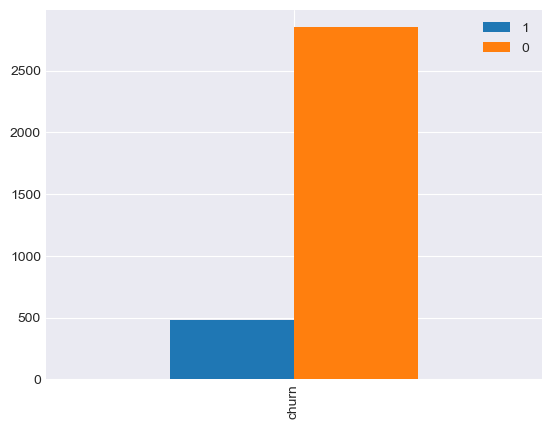

In [623]:
ones = pd.DataFrame(df.churn.apply(lambda x: 1 if x == 1 else 0))
zero = pd.DataFrame(df.churn.apply(lambda x: 1 if x == 0 else 0))
combo = pd.concat([ones.sum(), zero.sum()], axis=1)
combo.columns = ['1', '0']
combo.plot(kind='bar')

In [624]:
df.churn.value_counts()

0    2850
1     483
Name: churn, dtype: int64

<img src="img/lin.jpg">

# 2. Customers in different States

In [700]:
temp = df["state"].value_counts()
temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(df["churn"][df["state"]==val] == 1))
    temp_y0.append(np.sum(df["churn"][df["state"]==val] == 0))    
trace1 = go.Bar(
    x = temp.index,
    y = (temp_y0 / temp.sum()) * 100,
    name='Not Churn'
)
trace2 = go.Bar(
    x = temp.index,
    y = (temp_y1 / temp.sum()) * 100, 
    name='Churn'
)

data = [trace1, trace2]
layout = go.Layout(
    title = "Churn by states in %",
    #barmode='stack',
    width = 1000,
    xaxis=dict(
        title='States',
        tickfont=dict(
            size=8,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

<img src="img/cust_states.png">

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">
As we can see most of churn affects in states such as NJ, MD, TX also CA.

<img src="img/lin.jpg">

# 3. Account lenghth distribution + boxplot to detect outliers.

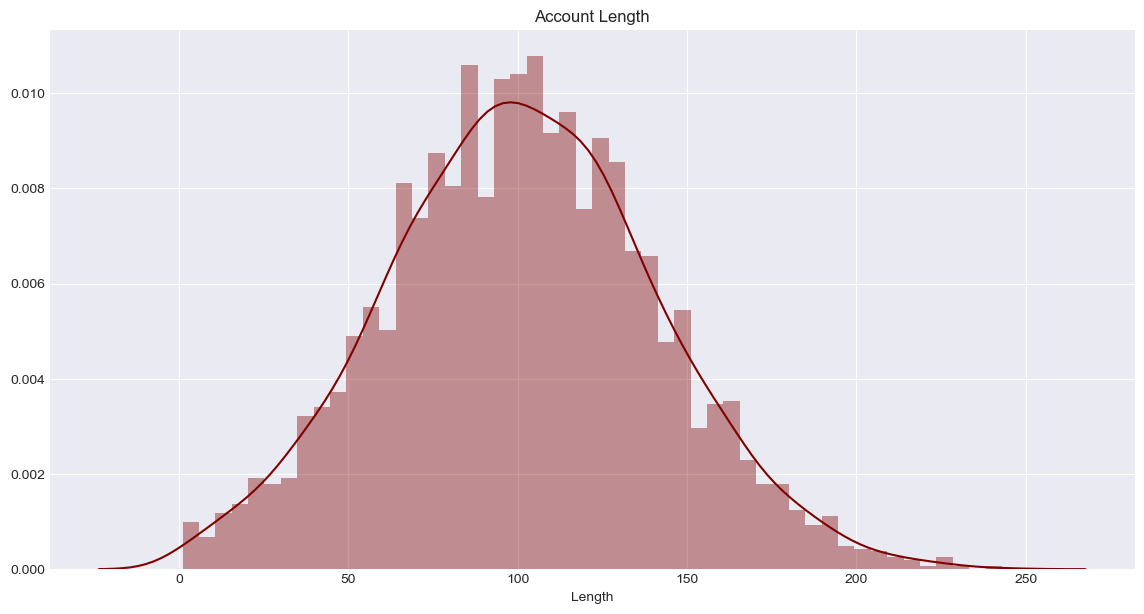

In [626]:
plt.figure(figsize=(14,7))
plt.title("Account Length")
ax = sns.distplot(df["account length"], color='#800000', bins=50, axlabel='Length')

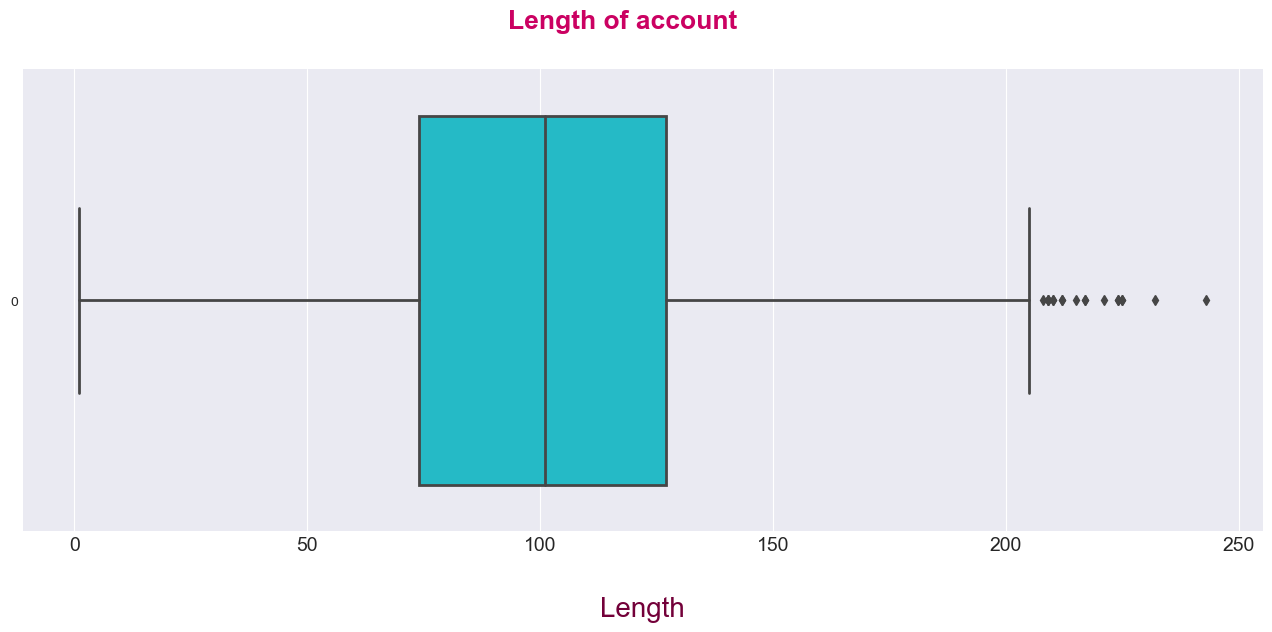

In [627]:
sns.set_style("darkgrid")
fig = plt.figure(1, figsize=(16,6))
ax = sns.boxplot(data=df["account length"].values, orient='h', fliersize=5, linewidth=2, notch=False, saturation=0.7, color='#02d8e9')
plt.suptitle('Length of account', fontsize=19, color='#cb0162',  weight = 'bold')
plt.xlabel('Length', fontsize=20, labelpad=30, color='#730039')
plt.xticks(fontsize=14)
plt.show()

In [628]:
check_corr = df[['account length', 'churn']].corr()  
check_corr

account length     churn
account length        1.000000  0.016541
churn                 0.016541  1.000000

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">
As we can see, account length normaly distributed. Most common length = 105. Also few outliers was detected. Corelation with our target is 0.016.

<img src="img/lin.jpg">

# 4. How many customers in different Areas.

In [629]:
# change type to object so I can use it for visualisation.
df['area code'] = df['area code'].astype('object')

In [701]:
temp = df["area code"].value_counts()
temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(df["churn"][df["area code"]==val] == 1))
    temp_y0.append(np.sum(df["churn"][df["area code"]==val] == 0))    
trace1 = go.Bar(
    x = temp.index,
    y = (temp_y0 / temp.sum()) * 100,
    name='Not Churn'
)
trace2 = go.Bar(
    x = temp.index,
    y = (temp_y1 / temp.sum()) * 100, 
    name='Churn'
)

data = [trace1, trace2]
layout = go.Layout(
    title = "Churn by Area Code in %",
    #barmode='stack',
    width = 1000,
    xaxis=dict(
        title='Area code',
        tickfont=dict(
            size=8,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

<img src="img/cust_area.png">

In [631]:
df['area code'].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">
We have only 3 different area code.

<img src="img/lin.jpg">

# 5. Phone number

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">
All numbers are unique, and i think there is no point to keep this feature for future analysis and modeling.

<img src="img/lin.jpg">

# 6. International Plan

In [702]:
temp = df["international plan"].value_counts()
fig = {
  "data": [
    {
      "values": temp.values,
      "labels": temp.index,
      "domain": {"x": [0, .48]},
      "hole": .7,
      "type": "pie"
    },
    
    ],
  "layout": {
        "title":"Type of plan International",
        "annotations": [
            {
                "font": {
                    "size": 15
                },
                "showarrow": False,
                "text": "Types",
                "x": 0.20,
                "y": 0.5
            }
            
        ]
    }
}
iplot(fig, filename='donut')

<img src="img/plan_type.png">

In [704]:
temp = df["international plan"].value_counts()
temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(df["churn"][df["international plan"]==val] == 1))
    temp_y0.append(np.sum(df["churn"][df["international plan"]==val] == 0))    
trace1 = go.Bar(
    x = temp.index,
    y = (temp_y0 / temp.sum()) * 100,
    name='Not Churn'
)
trace2 = go.Bar(
    x = temp.index,
    y = (temp_y1 / temp.sum()) * 100, 
    name='Churn'
)

data = [trace1, trace2]
layout = go.Layout(
    title = "Churn by type of plan (International - yes / Not International - no) %",
    #barmode='stack',
    width = 1000,
    xaxis=dict(
        title='Type of plan',
        tickfont=dict(
            size=8,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

<img src="img/plan_type_churn.png">

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">
Interesting thing that almost all internationa plans has chune, I will check features importance later in modeling part. And 10% of customers have international plan.

<img src="img/lin.jpg">

# 7. Voice Mail Plan.

In [706]:
temp = df["voice mail plan"].value_counts()
fig = {
  "data": [
    {
      "values": temp.values,
      "labels": temp.index,
      "domain": {"x": [0, .48]},
      "hole": .7,
      "type": "pie"
    },
    
    ],
  "layout": {
        "title":"Voice Mail Plan",
        "annotations": [
            {
                "font": {
                    "size": 15
                },
                "showarrow": False,
                "text": "Types",
                "x": 0.20,
                "y": 0.5
            }
            
        ]
    }
}
iplot(fig, filename='donut')

<img src="img/voice_mail.png">

In [707]:
temp = df["voice mail plan"].value_counts()
temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(df["churn"][df["voice mail plan"]==val] == 1))
    temp_y0.append(np.sum(df["churn"][df["voice mail plan"]==val] == 0))    
trace1 = go.Bar(
    x = temp.index,
    y = (temp_y0 / temp.sum()) * 100,
    name='Not Churn'
)
trace2 = go.Bar(
    x = temp.index,
    y = (temp_y1 / temp.sum()) * 100, 
    name='Churn'
)

data = [trace1, trace2]
layout = go.Layout(
    title = "Churn by type of plan (Voice mail - yes / Not voice mail - no) %",
    #barmode='stack',
    width = 1000,
    xaxis=dict(
        title='Type of plan',
        tickfont=dict(
            size=8,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

<img src="img/voice_mail_churn.png">

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">
27.7% of customers have Voice mail plan.

<img src="img/lin.jpg">

# 8. Number vmail messages.

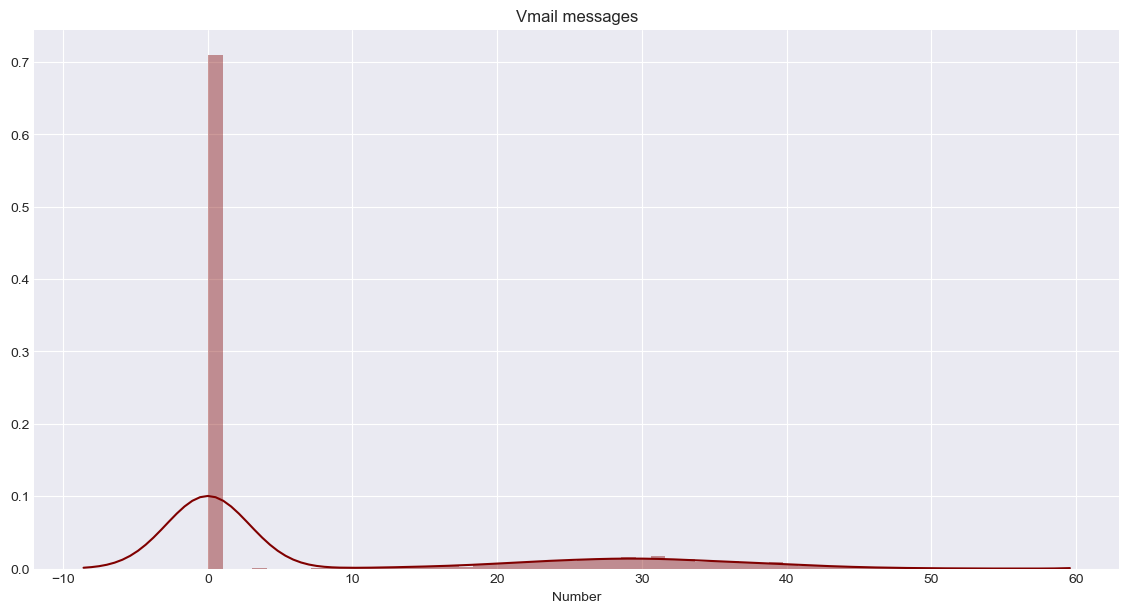

In [636]:
plt.figure(figsize=(14,7))
plt.title("Vmail messages")
ax = sns.distplot(df["number vmail messages"], color='#800000', bins=50, axlabel='Number')

In [637]:
check_corr = df[['number vmail messages', 'churn']].corr()  
check_corr

number vmail messages     churn
number vmail messages               1.000000 -0.089728
churn                              -0.089728  1.000000

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">
Sort of Binomial right skewed distribution. As we can see most of the customers dont use vmail messages. People who use it
uses about 31 time at pick.

<img src="img/lin.jpg">

# 9. Total day minutes.

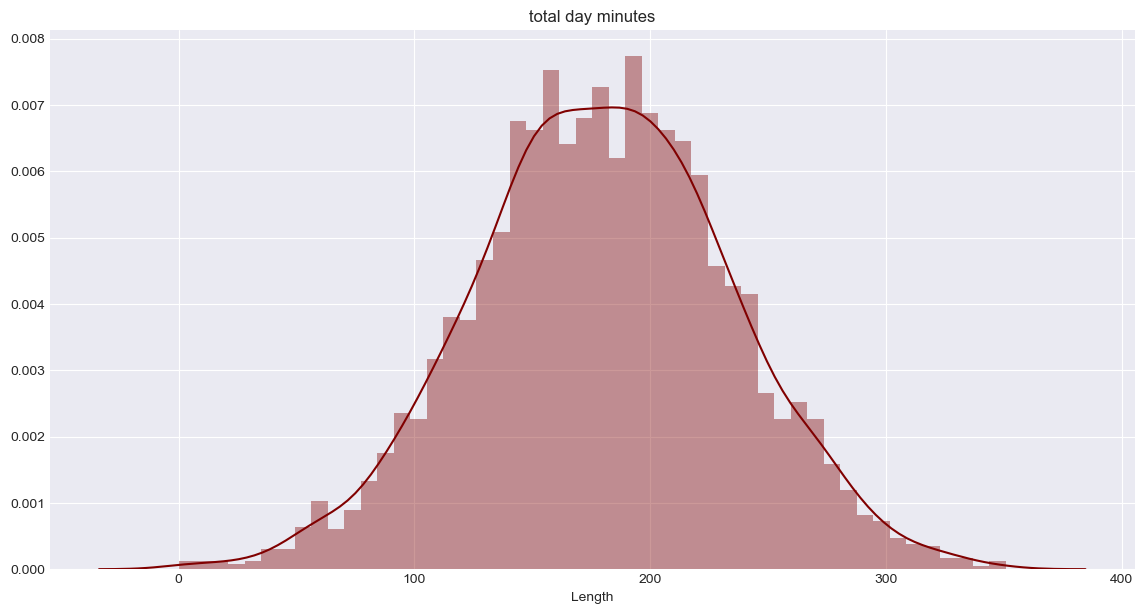

In [638]:
plt.figure(figsize=(14,7))
plt.title("total day minutes")
ax = sns.distplot(df["total day minutes"], color='#800000', bins=50, axlabel='Length')

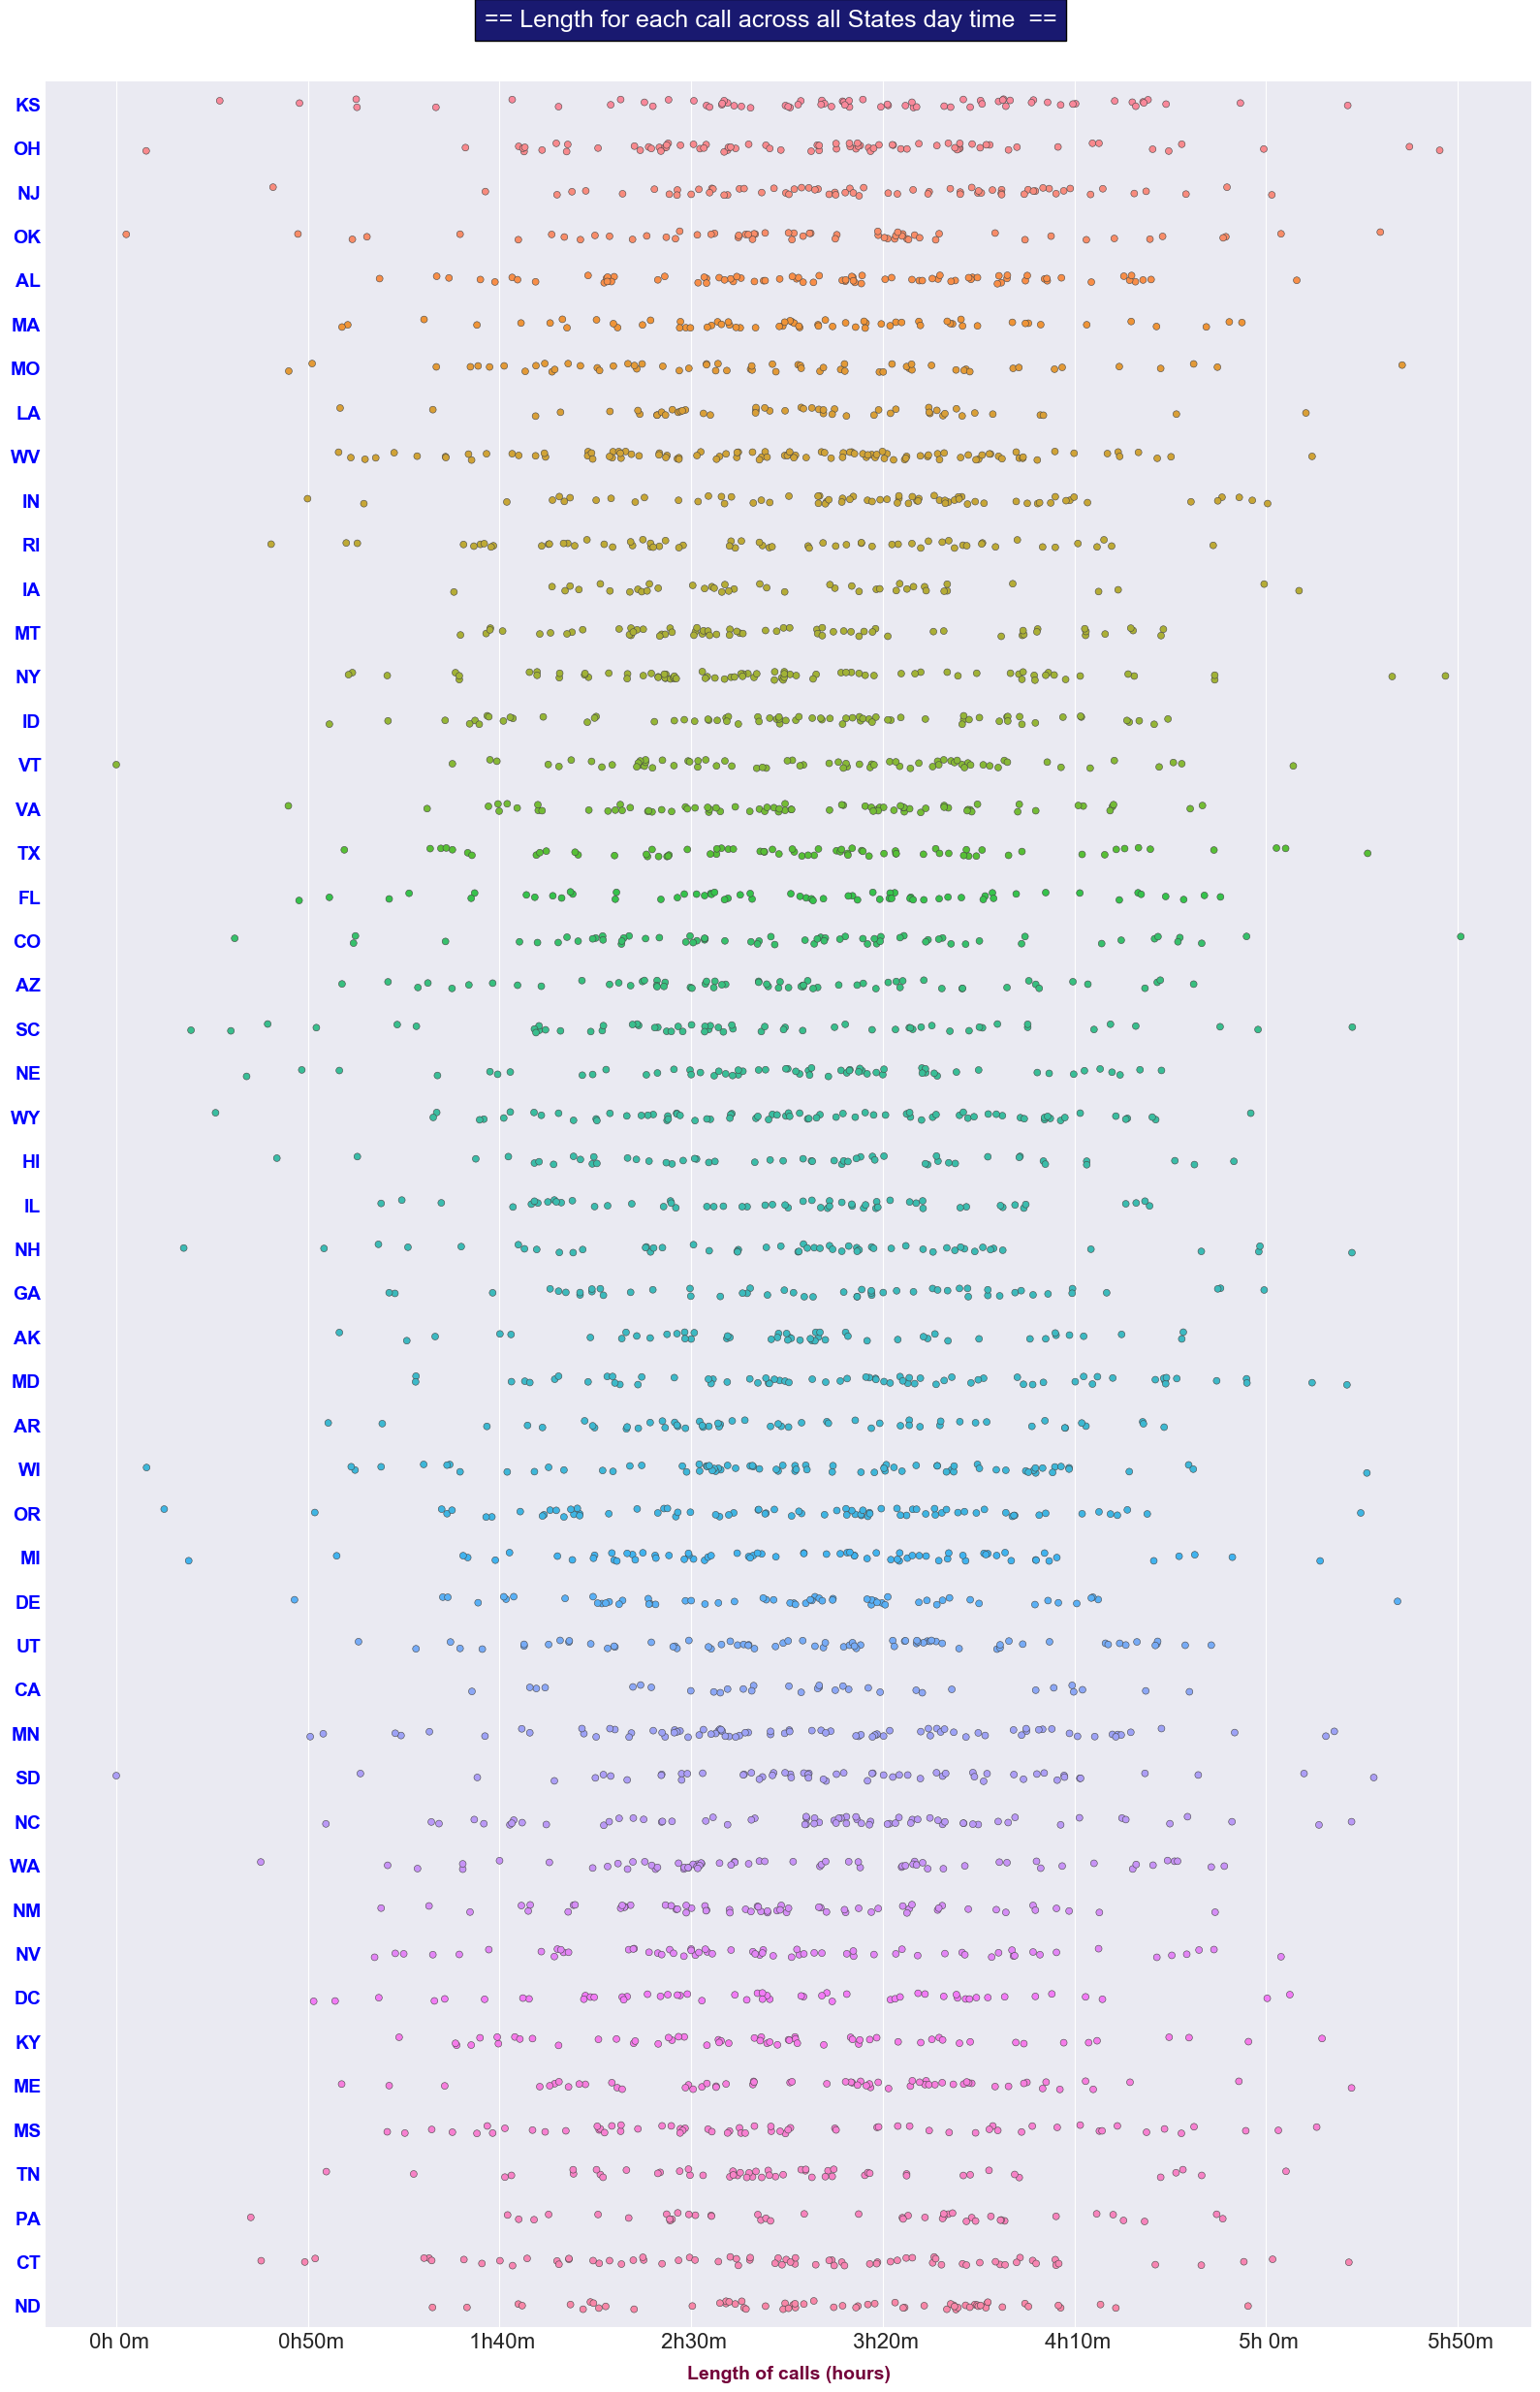

In [639]:
# SHOW IT VISUALY USING STRIPPLOT
# ________________________________________________________

fig = plt.figure(1, figsize = (16,25))


pl = sns.stripplot(y = 'state', x = 'total day minutes', size = 5, data = df,
                   linewidth = 0.4, jitter = True)

plt.setp(pl.get_xticklabels(), fontsize = 16)
plt.setp(pl.get_yticklabels(), fontsize = 14, weight = 'bold', color='b')
pl.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x, 60)]) for x in pl.get_xticks()])
pl.yaxis.label.set_visible(False)
plt.tight_layout(w_pad = 3)

plt.suptitle('== Length for each call across all States day time  ==', fontsize = 18, bbox = {'facecolor' : 'midnightblue', 'pad' : 7},
           color = 'w')
plt.subplots_adjust(top=0.95)
plt.xlabel('Length of calls (hours)',
           fontsize=14, weight = 'bold', labelpad=10, color='#730039');

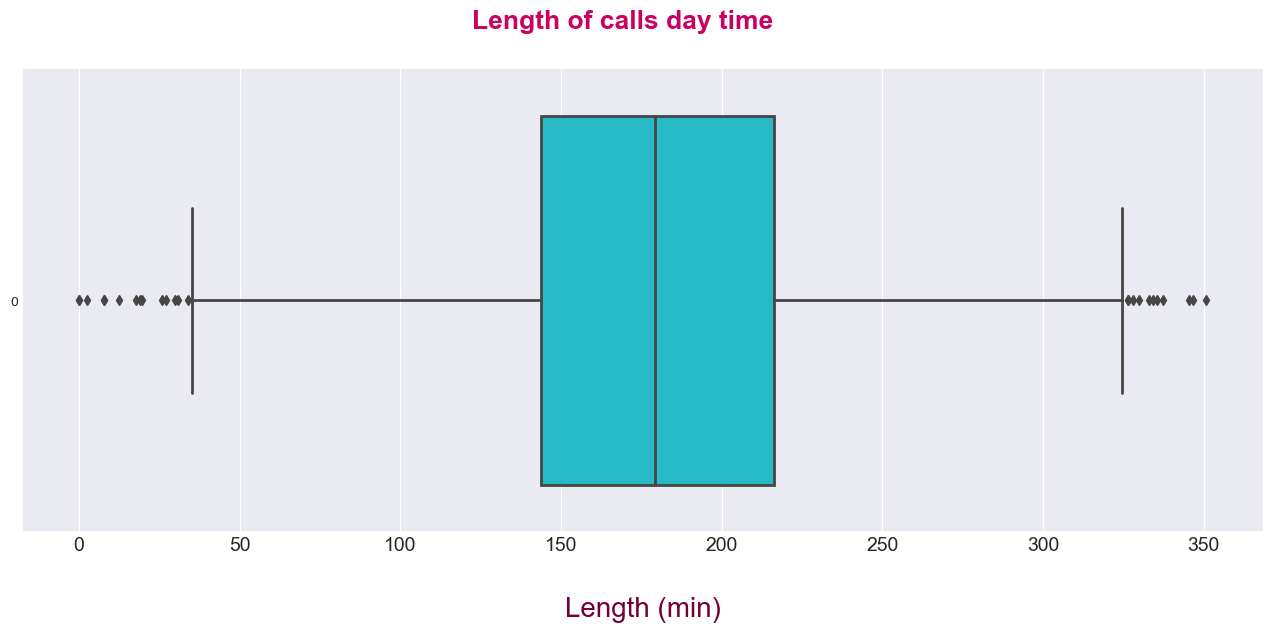

In [640]:
sns.set_style("darkgrid")
fig = plt.figure(1, figsize=(16,6))
ax = sns.boxplot(data=df["total day minutes"].values, orient='h', fliersize=5, linewidth=2, notch=False, saturation=0.7, color='#02d8e9')
plt.suptitle('Length of calls day time', fontsize=19, color='#cb0162',  weight = 'bold')
plt.xlabel('Length (min)', fontsize=20, labelpad=30, color='#730039')
plt.xticks(fontsize=14)
plt.show()

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">
As we can see more calls for each customer around 3hrs lenght. Also we can see that some calls reaching 5 hr per day same as almost 0 min per day. I want to brake leght of calls by 6 groups to see which group has most chune.

In [641]:
df['min_per_day_X'] = 0

In [642]:
df['min_per_day_X'] =  df['total day minutes'].apply(lambda x: 2 if x > 0 and x <= 60 else float(x))
df['min_per_day_X'] =  df['min_per_day_X'].apply(lambda x: 3 if x > 60 and x <= 120 else float(x))
df['min_per_day_X'] =  df['min_per_day_X'].apply(lambda x: 4 if x > 120 and x <= 180 else float(x))
df['min_per_day_X'] =  df['min_per_day_X'].apply(lambda x: 5 if x > 180 and x <= 240 else float(x))
df['min_per_day_X'] =  df['min_per_day_X'].apply(lambda x: 6 if x > 240 and x <= 300 else float(x))
df['min_per_day_X'] =  df['min_per_day_X'].apply(lambda x: 7 if x > 300 else float(x))
df['min_per_day_X'] =  df['min_per_day_X'].apply(lambda x: 1 if x not in [2,3,4,5,6,7] else float(x))

In [643]:
df['min_per_day_X'].value_counts()

4.0    1228
5.0    1213
3.0     399
6.0     396
2.0      52
7.0      43
1.0       2
Name: min_per_day_X, dtype: int64

In [708]:
temp = df["min_per_day_X"].value_counts()
temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(df["churn"][df["min_per_day_X"]==val] == 1))
    temp_y0.append(np.sum(df["churn"][df["min_per_day_X"]==val] == 0))    
trace1 = go.Bar(
    x = temp.index,
    y = (temp_y0 / temp.sum()) * 100,
    name='Not Churn'
)
trace2 = go.Bar(
    x = temp.index,
    y = (temp_y1 / temp.sum()) * 100, 
    name='Churn'
)

data = [trace1, trace2]
layout = go.Layout(
    title = "Churn by length of calls day time %",
    #barmode='stack',
    width = 1000,
    xaxis=dict(
        title='Length of calls by category',
        tickfont=dict(
            size=8,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

<img src="img/length_churn.png">

In [539]:
check_corr = df[['min_per_day_X', 'churn']].corr()  
check_corr

min_per_day_X     churn
min_per_day_X       1.000000  0.185909
churn               0.185909  1.000000

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">
Interesting thing here, people who talk longer per day seems to be more predisposed to churn 1, 6 and 7 categories which
is 0min, 4 hr per day and more than 5 hr per day. 

<img src="img/lin.jpg">

# 10. Total day calls.

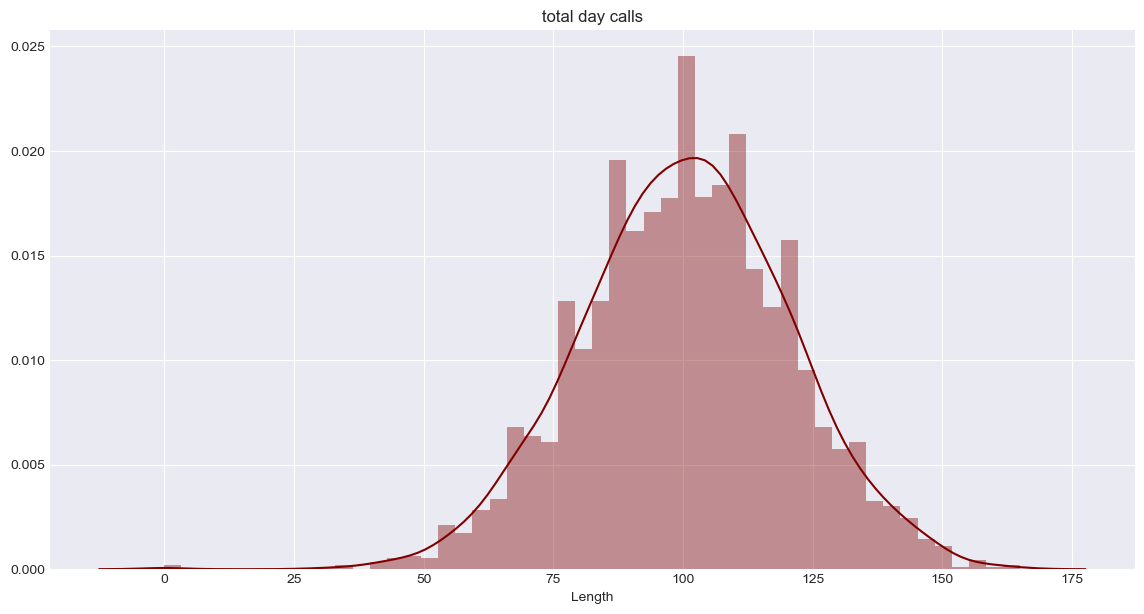

In [645]:
plt.figure(figsize=(14,7))
plt.title("total day calls")
ax = sns.distplot(df["total day calls"], color='#800000', bins=50, axlabel='Length')

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">
We have normal distribution for day calls, and only 2 customers who didnt make any calls.

In [710]:
temp = df["total day calls"].value_counts()
temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(df["churn"][df["total day calls"]==val] == 1))
    temp_y0.append(np.sum(df["churn"][df["total day calls"]==val] == 0))    
trace1 = go.Bar(
    x = temp.index,
    y = (temp_y0 / temp.sum()) * 100,
    name='Not Churn'
)
trace2 = go.Bar(
    x = temp.index,
    y = (temp_y1 / temp.sum()) * 100, 
    name='Churn'
)

data = [trace1, trace2]
layout = go.Layout(
    title = "Churn by number of calls %",
    #barmode='stack',
    width = 1000,
    xaxis=dict(
        title='Number of calls',
        tickfont=dict(
            size=8,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

<img src="img/n_calls_churn.png">

In [648]:
check_corr = df[['total day calls', 'churn']].corr()  
check_corr

total day calls     churn
total day calls         1.000000  0.018459
churn                   0.018459  1.000000

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">
As we can see churn almost folowing number of calls distribution. 

<img src="img/lin.jpg">

# 11. Total day charge.

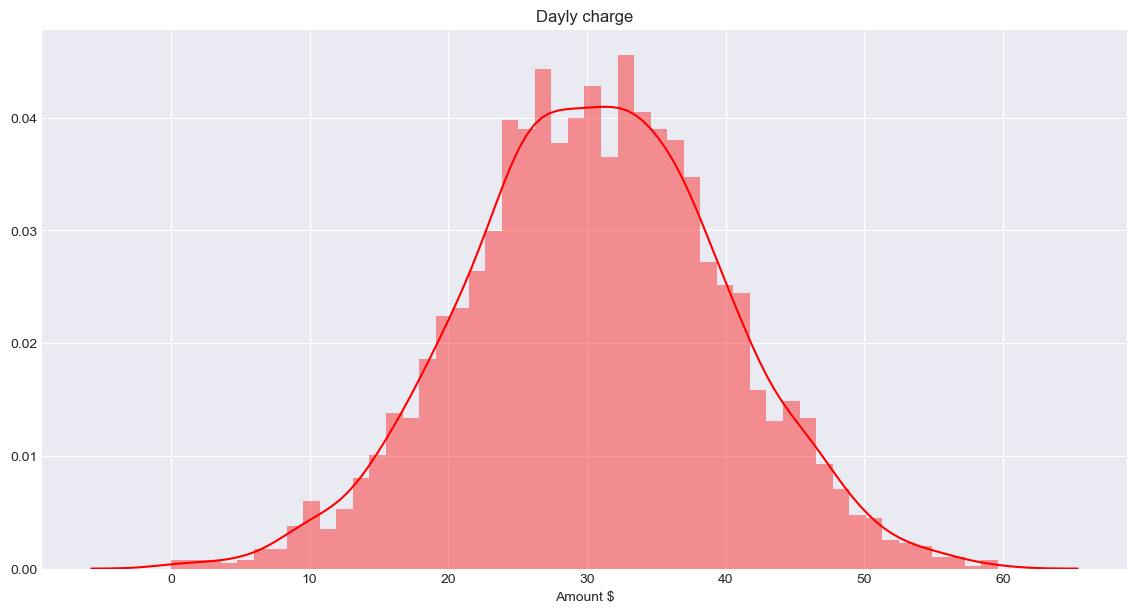

In [650]:
plt.figure(figsize=(14,7))
plt.title("Dayly charge")
ax = sns.distplot(df["total day charge"], color='r', bins=50, axlabel='Amount $')

In [711]:
temp = df["total day charge"].value_counts()
temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(df["churn"][df["total day charge"]==val] == 1))
    temp_y0.append(np.sum(df["churn"][df["total day charge"]==val] == 0))    
trace1 = go.Bar(
    x = temp.index,
    y = (temp_y0 / temp.sum()) * 100,
    name='Not Churn'
)
trace2 = go.Bar(
    x = temp.index,
    y = (temp_y1 / temp.sum()) * 100, 
    name='Churn'
)

data = [trace1, trace2]
layout = go.Layout(
    title = "Churn by charge amount %",
    #barmode='stack',
    width = 1000,
    xaxis=dict(
        title='Amount $',
        tickfont=dict(
            size=8,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

<img src="img/day_cha_churn1.png">

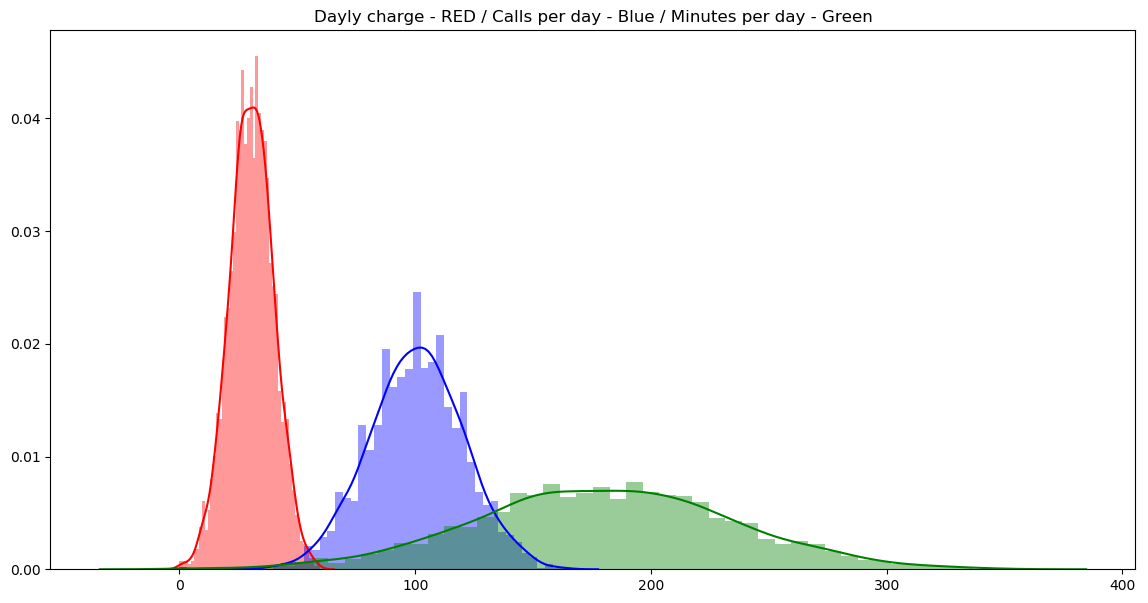

In [533]:
# Ignore xaxis mesure. (this is just for visual understanding)
plt.figure(figsize=(14,7))
plt.title("Dayly charge - RED / Calls per day - Blue / Minutes per day - Green")
ax = sns.distplot(df["total day charge"], color='r', bins=50, axlabel='')
ax = sns.distplot(df["total day calls"], color='b', bins=50, axlabel='')
ax = sns.distplot(df["total day minutes"], color='g', bins=50, axlabel='')

In [537]:
check_corr = df[['total day charge', 'churn']].corr()  
check_corr

total day charge     churn
total day charge          1.000000  0.205151
churn                     0.205151  1.000000

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">
If we look at all distribution they are logically correct, as more phone calls person does more money he will pay etc. 
But if we look at Churn by amount money paid we can see that if people pay more they most likely will churn. 

<img src="img/lin.jpg">

# 12. Total eve minutes.

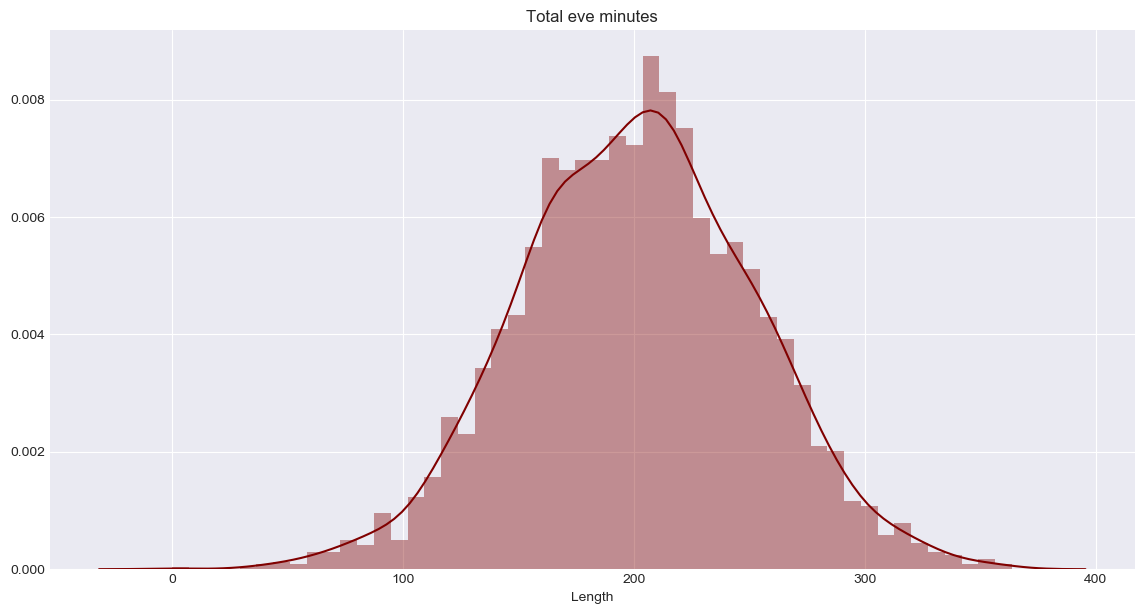

In [652]:
plt.figure(figsize=(14,7))
plt.title("Total eve minutes")
ax = sns.distplot(df["total eve minutes"], color='#800000', bins=50, axlabel='Length')

In [653]:
df['min_per_eve_X'] = 0
df['min_per_eve_X'] =  df['total eve minutes'].apply(lambda x: 2 if x > 0 and x <= 60 else float(x))
df['min_per_eve_X'] =  df['min_per_eve_X'].apply(lambda x: 3 if x > 60 and x <= 120 else float(x))
df['min_per_eve_X'] =  df['min_per_eve_X'].apply(lambda x: 4 if x > 120 and x <= 180 else float(x))
df['min_per_eve_X'] =  df['min_per_eve_X'].apply(lambda x: 5 if x > 180 and x <= 240 else float(x))
df['min_per_eve_X'] =  df['min_per_eve_X'].apply(lambda x: 6 if x > 240 and x <= 300 else float(x))
df['min_per_eve_X'] =  df['min_per_eve_X'].apply(lambda x: 7 if x > 300 else float(x))
df['min_per_eve_X'] =  df['min_per_eve_X'].apply(lambda x: 1 if x not in [2,3,4,5,6,7] else float(x))

In [654]:
df['min_per_eve_X'].value_counts()

5.0    1428
4.0     973
6.0     667
3.0     167
7.0      86
2.0      11
1.0       1
Name: min_per_eve_X, dtype: int64

In [712]:
temp = df["min_per_eve_X"].value_counts()
temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(df["churn"][df["min_per_eve_X"]==val] == 1))
    temp_y0.append(np.sum(df["churn"][df["min_per_eve_X"]==val] == 0))    
trace1 = go.Bar(
    x = temp.index,
    y = (temp_y0 / temp.sum()) * 100,
    name='Not Churn'
)
trace2 = go.Bar(
    x = temp.index,
    y = (temp_y1 / temp.sum()) * 100, 
    name='Churn'
)

data = [trace1, trace2]
layout = go.Layout(
    title = "Churn by length of calls eve time %",
    #barmode='stack',
    width = 1000,
    xaxis=dict(
        title='Length of calls by category',
        tickfont=dict(
            size=8,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

<img src="img/length_eve_churn.png">

In [656]:
check_corr = df[['min_per_eve_X', 'churn']].corr()  
check_corr

min_per_eve_X     churn
min_per_eve_X       1.000000  0.088397
churn               0.088397  1.000000

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">
Compare to day calls, here is not obvious chune if person talk more than 4 hr. Also correlation between churn and eve minutes lower than day minutes 0.186 vs 0.088

<img src="img/lin.jpg">

# 13. Total eve calls.

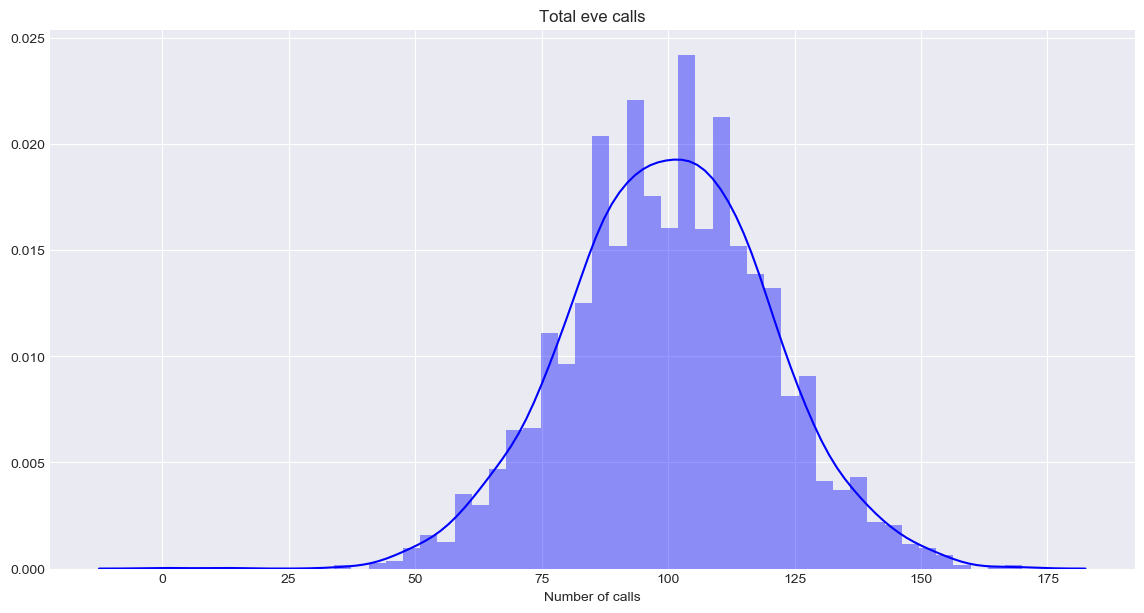

In [657]:
plt.figure(figsize=(14,7))
plt.title("Total eve calls")
ax = sns.distplot(df["total eve calls"], color='b', bins=50, axlabel='Number of calls')

In [658]:
check_corr = df[['total eve calls', 'churn']].corr()  
check_corr

total eve calls     churn
total eve calls         1.000000  0.009233
churn                   0.009233  1.000000

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">
Correlation much lower than day calls 0.018 vs 0.009.

<img src="img/lin.jpg">

# 14. Total eve charge vs day charge.

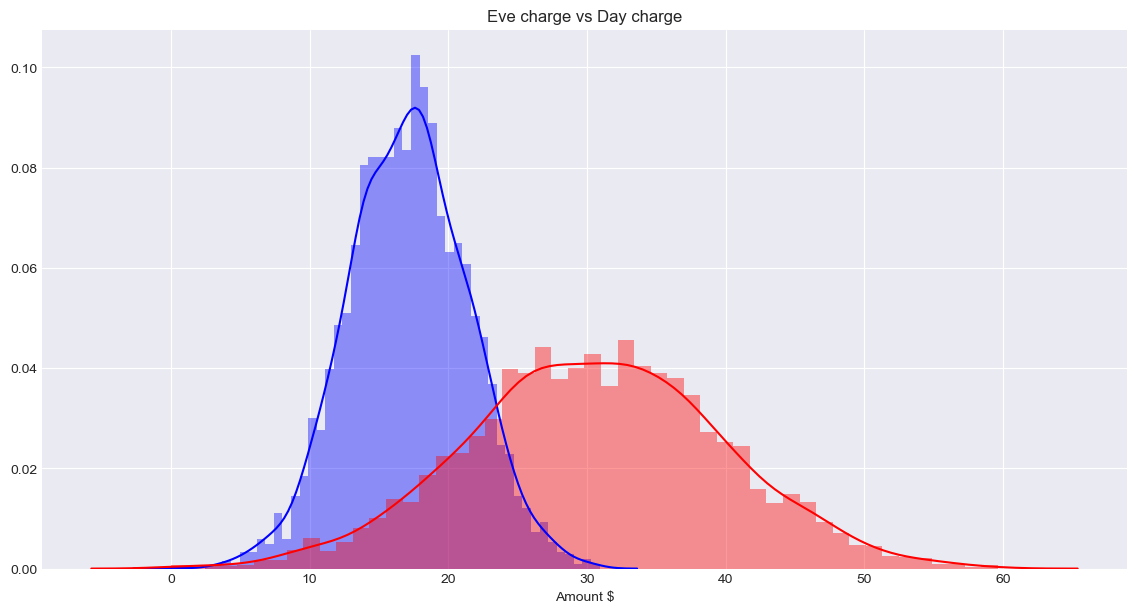

In [659]:
plt.figure(figsize=(14,7))
plt.title("Eve charge vs Day charge")
ax = sns.distplot(df["total eve charge"], color='b', bins=50, axlabel='Amount $')
ax = sns.distplot(df["total day charge"], color='r', bins=50, axlabel='Amount $')

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">
Eve time calls is almost twice cheaper than day time when at the same time number of calls and their lenght almost the same.

<img src="img/lin.jpg">

# 15. Total night minutes.

In [661]:
df['min_per_night_X'] = 0
df['min_per_night_X'] =  df['total night minutes'].apply(lambda x: 2 if x > 0 and x <= 60 else float(x))
df['min_per_night_X'] =  df['min_per_night_X'].apply(lambda x: 3 if x > 60 and x <= 120 else float(x))
df['min_per_night_X'] =  df['min_per_night_X'].apply(lambda x: 4 if x > 120 and x <= 180 else float(x))
df['min_per_night_X'] =  df['min_per_night_X'].apply(lambda x: 5 if x > 180 and x <= 240 else float(x))
df['min_per_night_X'] =  df['min_per_night_X'].apply(lambda x: 6 if x > 240 and x <= 300 else float(x))
df['min_per_night_X'] =  df['min_per_night_X'].apply(lambda x: 7 if x > 300 else float(x))
df['min_per_night_X'] =  df['min_per_night_X'].apply(lambda x: 1 if x not in [2,3,4,5,6,7] else float(x))

In [662]:
df['min_per_night_X'].value_counts()

5.0    1447
4.0     960
6.0     666
3.0     172
7.0      77
2.0      11
Name: min_per_night_X, dtype: int64

In [713]:
temp = df["min_per_night_X"].value_counts()
temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(df["churn"][df["min_per_night_X"]==val] == 1))
    temp_y0.append(np.sum(df["churn"][df["min_per_night_X"]==val] == 0))    
trace1 = go.Bar(
    x = temp.index,
    y = (temp_y0 / temp.sum()) * 100,
    name='Not Churn'
)
trace2 = go.Bar(
    x = temp.index,
    y = (temp_y1 / temp.sum()) * 100, 
    name='Churn'
)

data = [trace1, trace2]
layout = go.Layout(
    title = "Churn by length of calls night time %",
    #barmode='stack',
    width = 1000,
    xaxis=dict(
        title='Length of calls by category',
        tickfont=dict(
            size=8,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

<img src="img/length_night_churn.png">

In [664]:
check_corr = df[['min_per_night_X', 'churn']].corr()  
check_corr

min_per_night_X     churn
min_per_night_X         1.000000  0.035353
churn                   0.035353  1.000000

<img src="img/lin.jpg">

# 16. Total night calls.

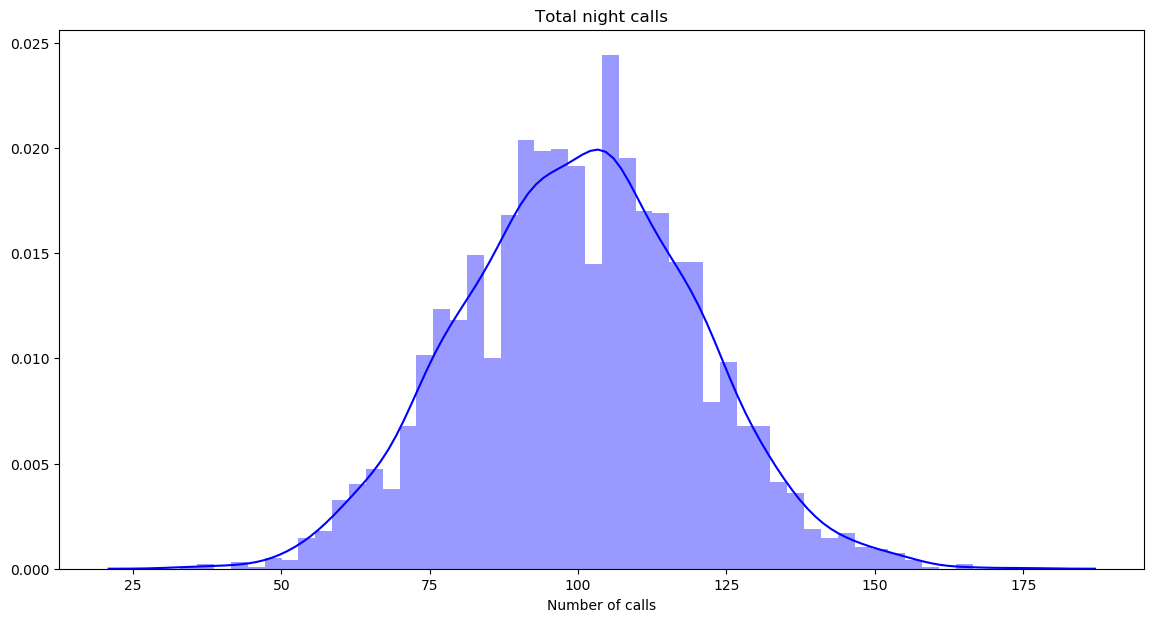

In [581]:
plt.figure(figsize=(14,7))
plt.title("Total night calls")
ax = sns.distplot(df["total night calls"], color='b', bins=50, axlabel='Number of calls')

In [665]:
check_corr = df[['total night calls', 'churn']].corr()  
check_corr

total night calls     churn
total night calls           1.000000  0.006141
churn                       0.006141  1.000000

<img src="img/lin.jpg">

# 17. Total night charge vs day charge.

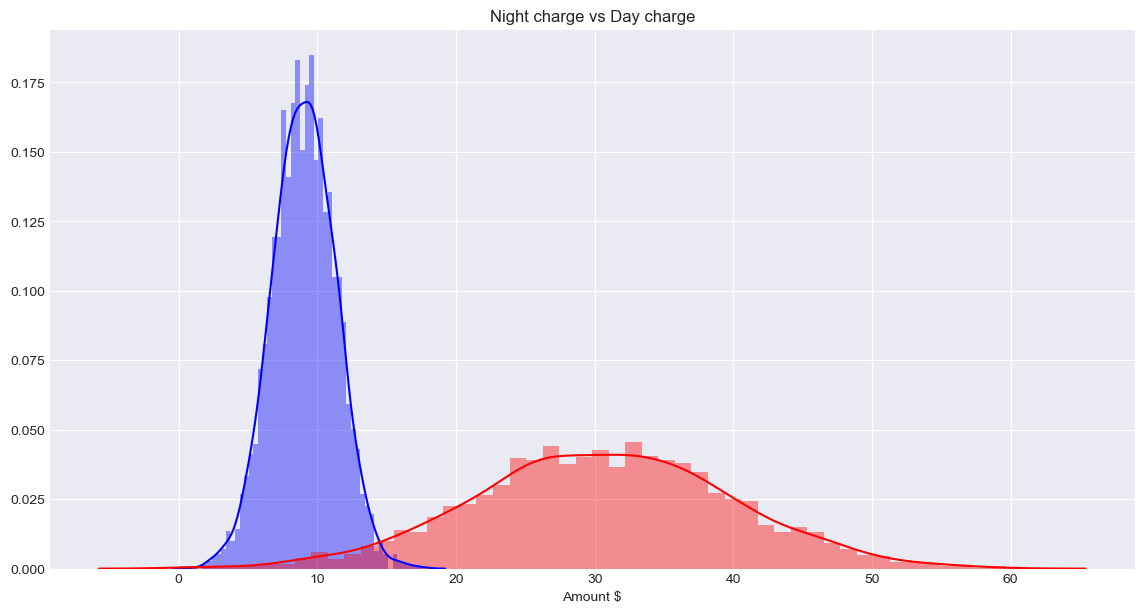

In [667]:
plt.figure(figsize=(14,7))
plt.title("Night charge vs Day charge")
ax = sns.distplot(df["total night charge"], color='b', bins=50, axlabel='Amount $')
ax = sns.distplot(df["total day charge"], color='r', bins=50, axlabel='Amount $')

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">
Night time calls is almost 3 times cheaper than day time.

<img src="img/lin.jpg">

# 18. Total intl minutes.

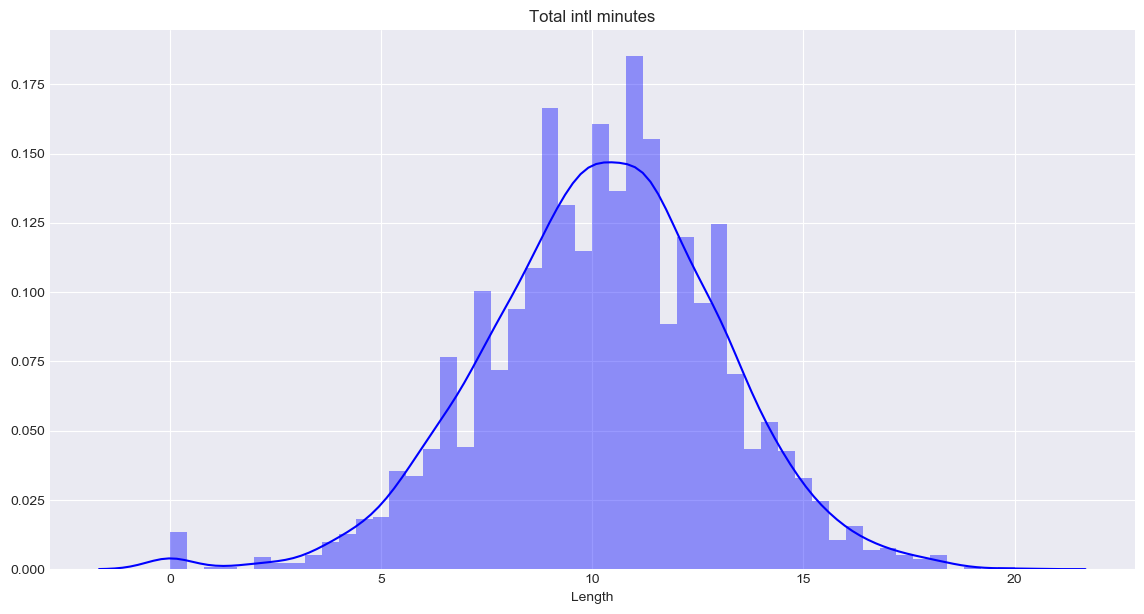

In [669]:
plt.figure(figsize=(14,7))
plt.title("Total intl minutes")
ax = sns.distplot(df["total intl minutes"], color='b', bins=50, axlabel='Length')

In [670]:
check_corr = df[['total intl minutes', 'churn']].corr()  
check_corr

total intl minutes     churn
total intl minutes            1.000000  0.068239
churn                         0.068239  1.000000

<img src="img/lin.jpg">

# 19. Total intl calls.

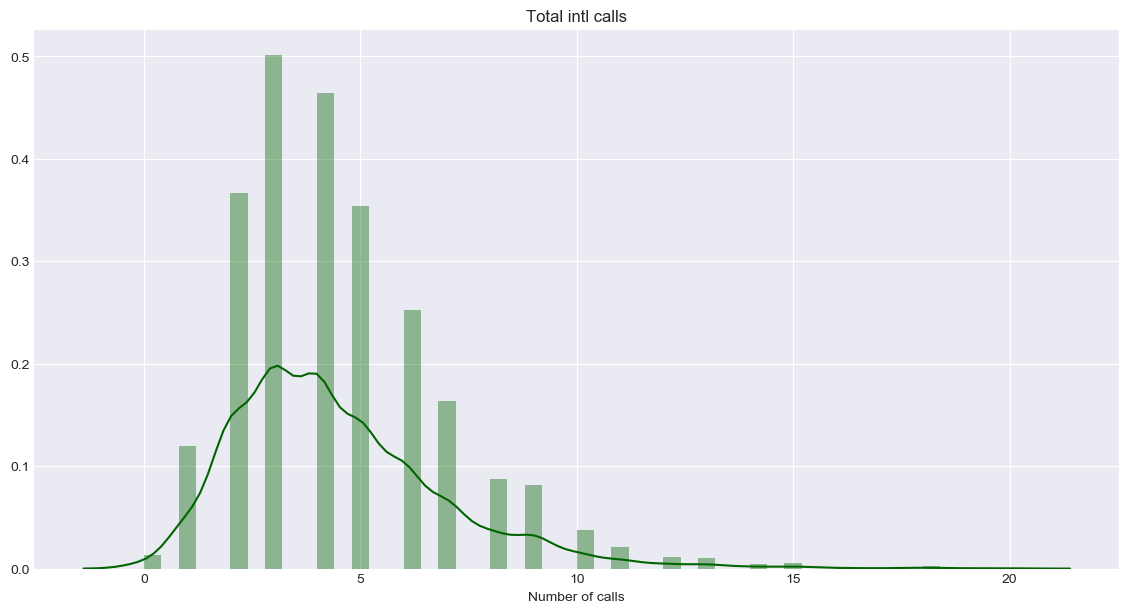

In [671]:
plt.figure(figsize=(14,7))
plt.title("Total intl calls")
ax = sns.distplot(df["total intl calls"], color='#006400', bins=50, axlabel='Number of calls')

In [672]:
check_corr = df[['total intl calls', 'churn']].corr()  
check_corr

total intl calls     churn
total intl calls          1.000000 -0.052844
churn                    -0.052844  1.000000

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">
Distribution right skewed. Number of international calls for most of accounts is around 3

<img src="img/lin.jpg">

# 20. Total intl charge.

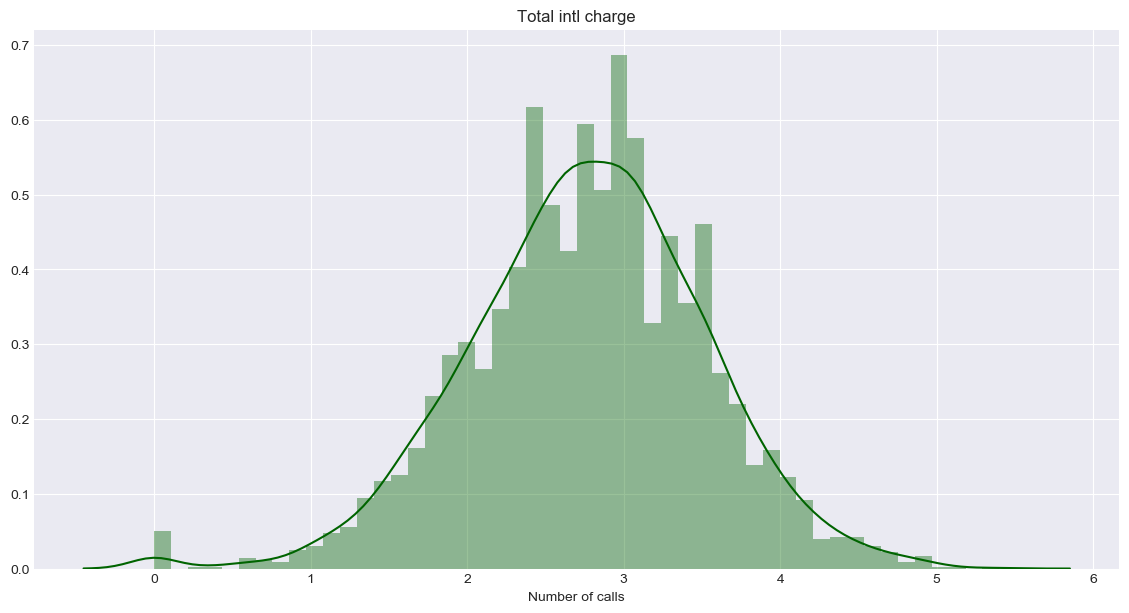

In [673]:
plt.figure(figsize=(14,7))
plt.title("Total intl charge")
ax = sns.distplot(df["total intl charge"], color='#006400', bins=50, axlabel='Number of calls')

In [674]:
check_corr = df[['total intl charge', 'churn']].corr()  
check_corr

total intl charge     churn
total intl charge           1.000000  0.068259
churn                       0.068259  1.000000

<img src="img/lin.jpg">

# 21. Customer service calls.

In [675]:
temp = df["customer service calls"].value_counts()
df_service = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })

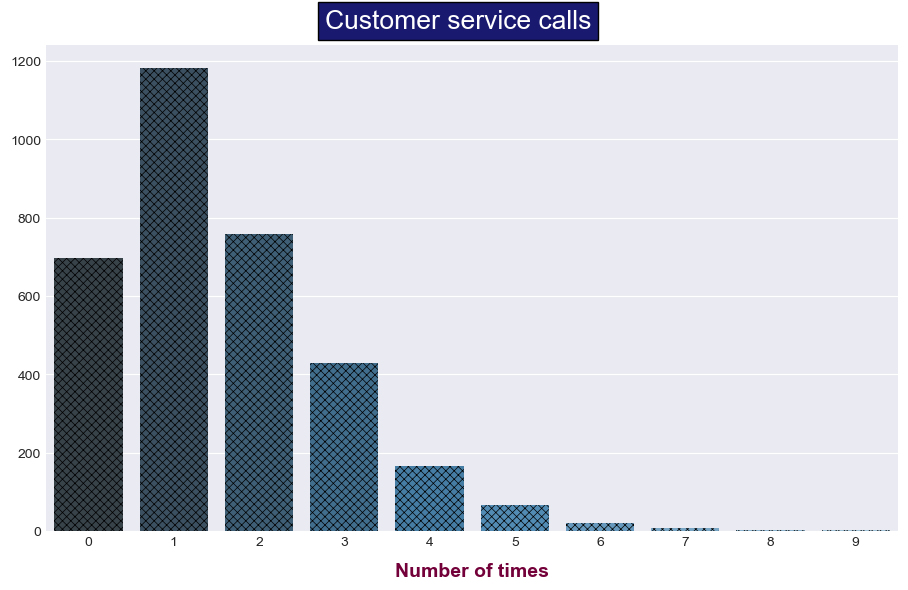

In [676]:
fig = plt.figure(1, figsize = (11, 6))
ax = sns.barplot(x = "labels", y = "values", data = df_service, color = "#da467d", ci = None, hatch = 'xxxx', palette="Blues_d")

ax.yaxis.label.set_visible(False)
plt.suptitle("Customer service calls", fontsize = 19, bbox = {'facecolor' : 'midnightblue', 'pad' : 5},
           color = 'w')
plt.subplots_adjust(top=0.92)
plt.xlabel('Number of times',
           fontsize=14, weight = 'bold', labelpad=10, color='#730039');

In [714]:
temp = df["customer service calls"].value_counts()
temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(df["churn"][df["customer service calls"]==val] == 1))
    temp_y0.append(np.sum(df["churn"][df["customer service calls"]==val] == 0))    
trace1 = go.Bar(
    x = temp.index,
    y = (temp_y0 / temp.sum()) * 100,
    name='Not Churn'
)
trace2 = go.Bar(
    x = temp.index,
    y = (temp_y1 / temp.sum()) * 100, 
    name='Churn'
)

data = [trace1, trace2]
layout = go.Layout(
    title = "Churn by number of calls to service %",
    #barmode='stack',
    width = 1000,
    xaxis=dict(
        title="Calls (Number of times)",
        tickfont=dict(
            size=15,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

<img src="img/number_calls_service.png">

In [678]:
check_corr = df[['customer service calls', 'churn']].corr()  
check_corr

customer service calls    churn
customer service calls                 1.00000  0.20875
churn                                  0.20875  1.00000

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f">
We can see high correlation between number of times account called to Customer Service and chune. If person called to service 
5 times there is more than 50% chance that he will churn.

<img src="img/lin.jpg">

# Conclusion

Data is pretty clean, not NaN values and not missing values. There is a big issue for our future modeling which is class imbalance problem. Also there are some outliers but not too big, which i think will not affect our modeling. As a strong predictors we already can see (Customer service calls, Total day charge, International Plan). Most of distributions is normaly distributed.

[GO NEXT >>](./Feature_engineering.ipynb)